# Image Recognition with Convolutional Neural Networks (CNN)
## Dataset: MNIST Handwritten Digits

This notebook demonstrates how to build, train, and evaluate a Convolutional Neural Network (CNN) for image recognition using the MNIST dataset. Each section includes explanations to clarify the concept and corresponding implementation.

### Learning Objectives
By the end of this notebook you will be able to:
1. Understand the fundamental workflow of image recognition with CNNs.
2. Load and preprocess the MNIST dataset for deep‑learning tasks.
3. Build a simple yet effective CNN using TensorFlow / Keras.
4. Train the model and visualize training versus validation performance.
5. Make predictions on unseen images and interpret the results.

*Adapted from the module **“Image Recognition with CNNs”** (Dr. Yulius Denny Prabowo, BINUS Online).*

### 1  Install and Import Required Libraries
The cell below checks whether **TensorFlow** is installed and installs it if necessary. Afterwards, we import all libraries needed throughout the notebook.

In [1]:
# Uncomment the line below if TensorFlow is not installed in your environment
# !pip install tensorflow matplotlib numpy

import tensorflow as tf
from tensorflow.keras import layers, models
from tensorflow.keras.datasets import mnist
from tensorflow.keras.utils import to_categorical

import numpy as np
import matplotlib.pyplot as plt

print("TensorFlow version:", tf.__version__)

TensorFlow version: 2.19.0


### 2  Load the MNIST Dataset
We load the MNIST dataset, which contains **60 000** training images and **10 000** test images of handwritten digits (0‑9) in grayscale (28 × 28 px).

In [2]:
(X_train, y_train), (X_test, y_test) = mnist.load_data()
print(f"Training set shape: {X_train.shape} | Labels: {y_train.shape}")
print(f"Test set shape    : {X_test.shape} | Labels: {y_test.shape}")

Training set shape: (60000, 28, 28) | Labels: (60000,)
Test set shape    : (10000, 28, 28) | Labels: (10000,)


### 3  Visualize Sample Images
A quick glance at some examples helps us understand the raw input our model will receive.

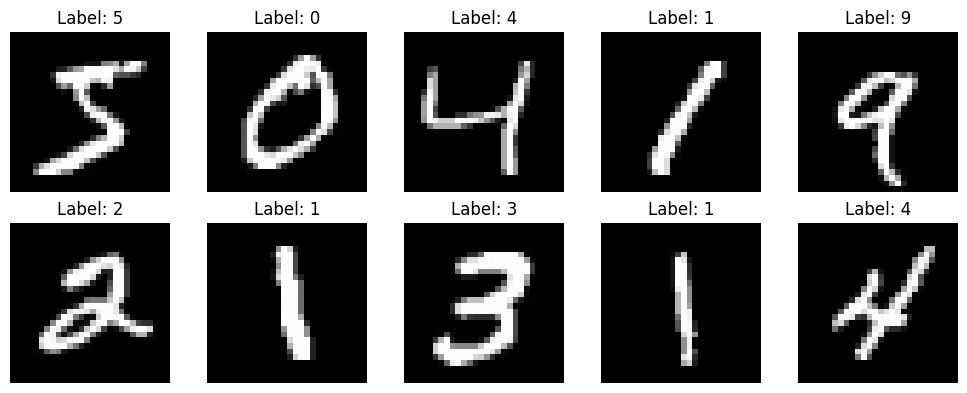

In [3]:
plt.figure(figsize=(10,4))
for i in range(10):
    plt.subplot(2,5,i+1)
    plt.imshow(X_train[i], cmap='gray')
    plt.title(f"Label: {y_train[i]}")
    plt.axis('off')
plt.tight_layout()
plt.show()

### 4  Preprocess Data
1. **Normalize** pixel values from the range 0‑255 to 0‑1 for faster convergence.
2. **One‑hot encode** the labels for categorical classification.
3. **Reshape** images to add a channel dimension expected by CNN layers.

In [4]:
# Normalize
X_train = X_train.astype("float32") / 255.0
X_test  = X_test.astype("float32")  / 255.0

# One‑hot encode labels
y_train = to_categorical(y_train, 10)
y_test  = to_categorical(y_test, 10)

# Reshape to (28, 28, 1)
X_train = X_train.reshape(-1, 28, 28, 1)
X_test  = X_test.reshape(-1, 28, 28, 1)

print("Data ready  ➜", X_train.shape, y_train.shape)

Data ready  ➜ (60000, 28, 28, 1) (60000, 10)


### 5  Build the CNN Model
Our architecture consists of three convolutional blocks followed by a fully connected head. This simple design is sufficient to achieve >98 % accuracy on MNIST.

In [5]:
model = models.Sequential([
    layers.Conv2D(32, (3,3), activation='relu', input_shape=(28,28,1)),
    layers.MaxPooling2D((2,2)),
    
    layers.Conv2D(64, (3,3), activation='relu'),
    layers.MaxPooling2D((2,2)),
    
    layers.Conv2D(128, (3,3), activation='relu'),
    layers.Flatten(),
    
    layers.Dense(128, activation='relu'),
    layers.Dense(10, activation='softmax')  # 10 classes (digits 0‑9)
])

model.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

model.summary()

/Users/fitrakacamarga/project/self/ai_courses/.venv/lib/python3.11/site-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 26, 26, 32)     │           320 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 13, 13, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 11, 11, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 5, 5, 64)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_2 (Conv2D)               │ (None, 3, 3, 128)      │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 1152)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 128)            │       147,584 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 10)             │         1,290 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 241,546 (943.54 KB)

 Trainable params: 241,546 (943.54 KB)

 Non-trainable params: 0 (0.00 B)

### 6  Train the Model
We train for **5 epochs** with a batch size of **64**. Feel free to increase the number of epochs to see if accuracy improves.

In [6]:
history = model.fit(
    X_train, y_train,
    epochs=5,
    batch_size=64,
    validation_data=(X_test, y_test),
    verbose=2
)

Epoch 1/5
938/938 - 8s - 9ms/step - accuracy: 0.9535 - loss: 0.1534 - val_accuracy: 0.9801 - val_loss: 0.0586
Epoch 2/5
938/938 - 9s - 9ms/step - accuracy: 0.9864 - loss: 0.0437 - val_accuracy: 0.9896 - val_loss: 0.0314
Epoch 3/5
938/938 - 9s - 10ms/step - accuracy: 0.9903 - loss: 0.0308 - val_accuracy: 0.9903 - val_loss: 0.0264
Epoch 4/5
938/938 - 10s - 10ms/step - accuracy: 0.9927 - loss: 0.0231 - val_accuracy: 0.9907 - val_loss: 0.0306
Epoch 5/5
938/938 - 9s - 9ms/step - accuracy: 0.9940 - loss: 0.0195 - val_accuracy: 0.9885 - val_loss: 0.0369


### 7  Visualize Training vs. Validation Performance

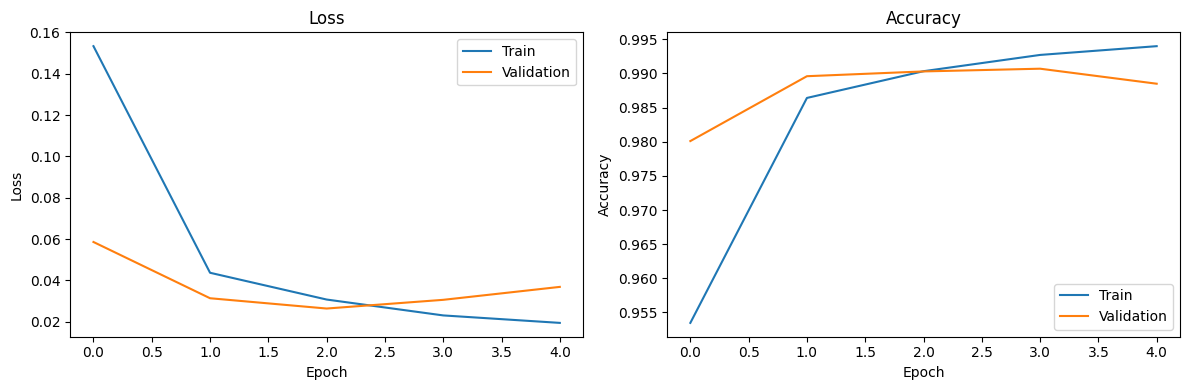

In [7]:
plt.figure(figsize=(12,4))
# Loss
plt.subplot(1,2,1)
plt.plot(history.history['loss'], label='Train')
plt.plot(history.history['val_loss'], label='Validation')
plt.title('Loss')
plt.xlabel('Epoch'); plt.ylabel('Loss'); plt.legend()

# Accuracy
plt.subplot(1,2,2)
plt.plot(history.history['accuracy'], label='Train')
plt.plot(history.history['val_accuracy'], label='Validation')
plt.title('Accuracy')
plt.xlabel('Epoch'); plt.ylabel('Accuracy'); plt.legend()

plt.tight_layout()
plt.show()

### 8  Make a Prediction
Let’s predict the first image in the test set and compare the model’s guess to the ground‑truth label.

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step


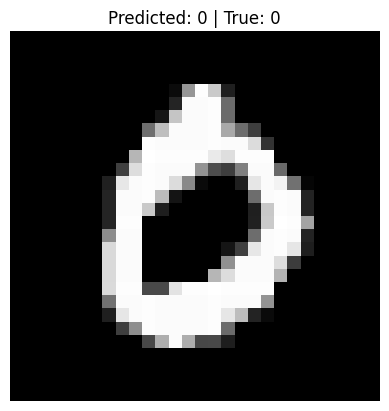

In [11]:
index = 3  # change this value to test other images
sample = X_test[index]

pred = model.predict(np.expand_dims(sample, axis=0))
predicted_class = np.argmax(pred, axis=1)[0]
true_class = np.argmax(y_test[index])

plt.imshow(sample.squeeze(), cmap='gray')
plt.title(f"Predicted: {predicted_class} | True: {true_class}")
plt.axis('off')
plt.show()

In [12]:
# Make sure to import these if they aren't already imported
from tensorflow.keras.layers import BatchNormalization, Dropout

# Updated model with BatchNormalization and Dropout
model = models.Sequential([
    # First convolutional block
    layers.Conv2D(32, (3,3), padding='same', input_shape=(28,28,1)),
    layers.BatchNormalization(),
    layers.Activation('relu'),
    layers.MaxPooling2D((2,2)),
    layers.Dropout(0.25),
    
    # Second convolutional block
    layers.Conv2D(64, (3,3), padding='same'),
    layers.BatchNormalization(),
    layers.Activation('relu'),
    layers.MaxPooling2D((2,2)),
    layers.Dropout(0.25),
    
    # Third convolutional block
    layers.Conv2D(128, (3,3), padding='same'),
    layers.BatchNormalization(),
    layers.Activation('relu'),
    layers.Dropout(0.25),
    layers.Flatten(),
    
    # Dense layers
    layers.Dense(128),
    layers.BatchNormalization(),
    layers.Activation('relu'),
    layers.Dropout(0.5),
    layers.Dense(10, activation='softmax')  # 10 classes (digits 0‑9)
])

model.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

model.summary()

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_3 (Conv2D)               │ (None, 28, 28, 32)     │           320 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization             │ (None, 28, 28, 32)     │           128 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ activation (Activation)         │ (None, 28, 28, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_2 (MaxPooling2D)  │ (None, 14, 14, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 14, 14, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_4 (Conv2D)               │ (None, 14, 14, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_1           │ (None, 14, 14, 64)     │           256 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ activation_1 (Activation)       │ (None, 14, 14, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_3 (MaxPooling2D)  │ (None, 7, 7, 64)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 7, 7, 64)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_5 (Conv2D)               │ (None, 7, 7, 128)      │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_2           │ (None, 7, 7, 128)      │           512 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ activation_2 (Activation)       │ (None, 7, 7, 128)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_2 (Dropout)             │ (None, 7, 7, 128)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_1 (Flatten)             │ (None, 6272)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 128)            │       802,944 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_3           │ (None, 128)            │           512 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ activation_3 (Activation)       │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_3 (Dropout)             │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 10)             │         1,290 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 898,314 (3.43 MB)

 Trainable params: 897,610 (3.42 MB)

 Non-trainable params: 704 (2.75 KB)

In [13]:
history = model.fit(
    X_train, y_train,
    epochs=5,
    batch_size=64,
    validation_data=(X_test, y_test),
    verbose=2
)

Epoch 1/5
938/938 - 26s - 28ms/step - accuracy: 0.9401 - loss: 0.2058 - val_accuracy: 0.9856 - val_loss: 0.0421
Epoch 2/5
938/938 - 26s - 28ms/step - accuracy: 0.9759 - loss: 0.0812 - val_accuracy: 0.9905 - val_loss: 0.0276
Epoch 3/5
938/938 - 26s - 28ms/step - accuracy: 0.9797 - loss: 0.0673 - val_accuracy: 0.9917 - val_loss: 0.0223
Epoch 4/5
938/938 - 25s - 27ms/step - accuracy: 0.9831 - loss: 0.0564 - val_accuracy: 0.9893 - val_loss: 0.0340
Epoch 5/5
938/938 - 25s - 27ms/step - accuracy: 0.9841 - loss: 0.0508 - val_accuracy: 0.9923 - val_loss: 0.0225


### 9  Next Steps & Exercises
* Try adding **Dropout** or **Batch Normalization** layers to mitigate overfitting.
* Replace MNIST with **Fashion MNIST** and adjust the CNN accordingly.
* Experiment with data augmentation (`tf.keras.preprocessing.image.ImageDataGenerator`).
* **Challenge:** Achieve ≥90 % accuracy on Fashion MNIST within 10 epochs.